<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [2]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [4]:
data = pd.read_csv('./train.csv')

In [5]:
rows = sorted(np.random.randint(0, data.shape[0], 5))

In [6]:
data.iloc[rows]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2663,3,83.90,267.4,Female,1,Yes,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,1
3207,12,20.05,264.55,Female,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Electronic check,0
3277,42,49.55,2077.95,Female,0,No,No,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0
4530,1,45.30,45.3,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,1
4543,2,79.65,152.7,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Mailed check,1


In [7]:
pd.DataFrame(data.isna().sum(axis = 0)) #-> no Nan's

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


In [8]:
data.info() #-> в TotalSpent есть пропуски(не числовой тип, а object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [9]:
pd.DataFrame((data == " ").sum(axis = 0)) #видим, в TotalSpent 9 пропущенных значений, все остальное - не пропущенно

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,9
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


In [10]:
print(data[data['TotalSpent'] == ' '])
print(data[data['ClientPeriod'] == 0])# т.е. это - те клиенты, которые еще 1 месяц -> для них траты = 0

      ClientPeriod  MonthlySpending  ...              PaymentMethod Churn
1048             0            25.75  ...               Mailed check     0
1707             0            73.35  ...               Mailed check     0
2543             0            19.70  ...               Mailed check     0
3078             0            80.85  ...               Mailed check     0
3697             0            20.00  ...               Mailed check     0
4002             0            61.90  ...  Bank transfer (automatic)     0
4326             0            25.35  ...               Mailed check     0
4551             0            52.55  ...  Bank transfer (automatic)     0
4598             0            56.05  ...    Credit card (automatic)     0

[9 rows x 20 columns]
      ClientPeriod  MonthlySpending  ...              PaymentMethod Churn
1048             0            25.75  ...               Mailed check     0
1707             0            73.35  ...               Mailed check     0
2543           

In [11]:
# Избавление от пропусков в столбце TotalSpent
data['TotalSpent'][data[data['TotalSpent'] == ' '].index] = 0
data['TotalSpent'] = data['TotalSpent'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
data.info()# теперь все значения заполнены

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [13]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

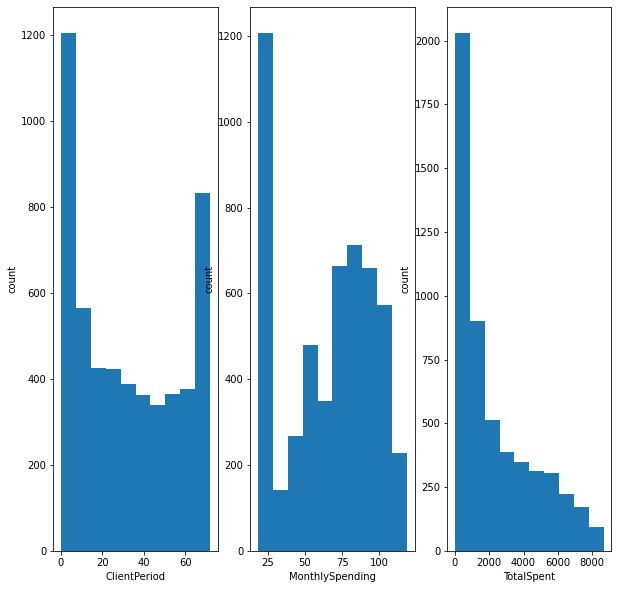

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (10, 10))
for j in range(3):
    axes[j].hist(data[num_cols[j]])
    axes[j].set_ylabel('count')
    axes[j].set_xlabel(num_cols[j])

In [15]:
for fea in cat_cols:
    print(data[fea].value_counts())
    print()

Male      2655
Female    2627
Name: Sex, dtype: int64

0    4440
1     842
Name: IsSeniorCitizen, dtype: int64

No     2705
Yes    2577
Name: HasPartner, dtype: int64

No     3676
Yes    1606
Name: HasChild, dtype: int64

Yes    4761
No      521
Name: HasPhoneService, dtype: int64

No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64

Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64

No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64

No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64

No                     2317
Yes                    1824
No internet service    1141
Name: HasDeviceProtection, dtype: int64

No                     2604
Yes                    1537
No internet service    1141
Name: HasTechSupportAccess, dtype: in

[3898, 1384]
[0, 1]


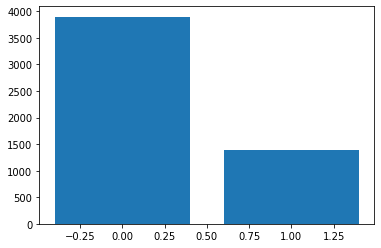

In [16]:
fig, ax = plt.subplots()

print(list(data['Churn'].value_counts()))
print(list(data['Churn'].value_counts().index))
ax.bar((data['Churn'].value_counts().index), (data['Churn'].value_counts()))
plt.show()

20it [00:05,  3.57it/s]


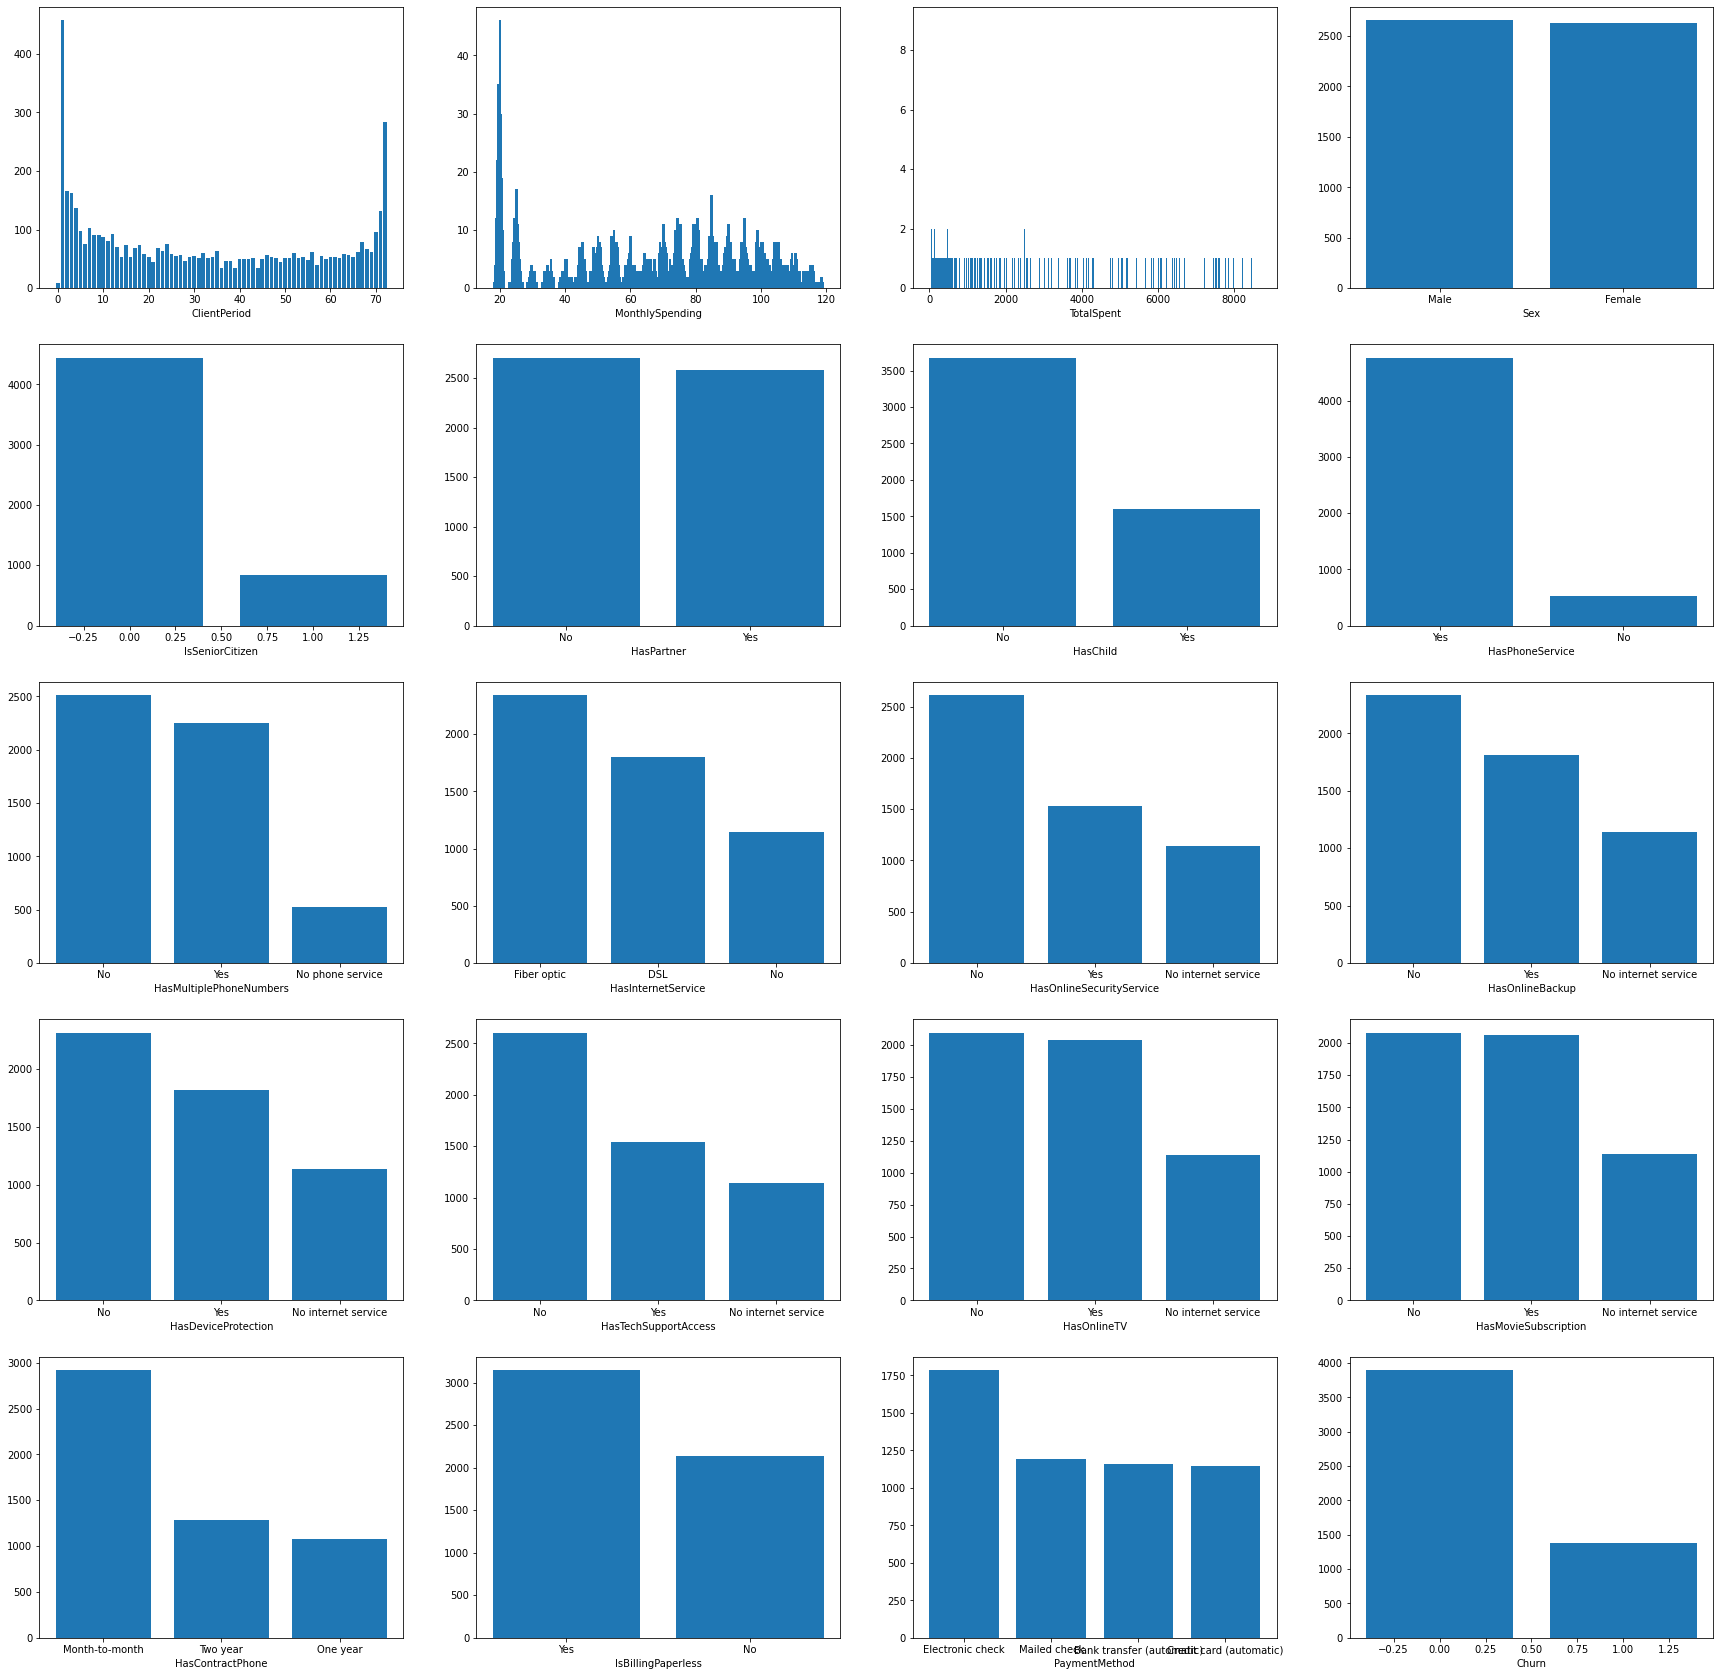

In [17]:
from tqdm import tqdm
fig1, axes1 = plt.subplots(nrows=5, ncols=4, figsize = (30, 30))
for id, j in tqdm(enumerate(data.columns)):
    lst1 = (data[j].value_counts().index)
    lst2 = (data[j].value_counts())
    axes1[id // 4][id % 4].bar(lst1, lst2)
    axes1[id // 4][id % 4].set_xlabel(j) 
plt.show()

20it [00:07,  2.57it/s]


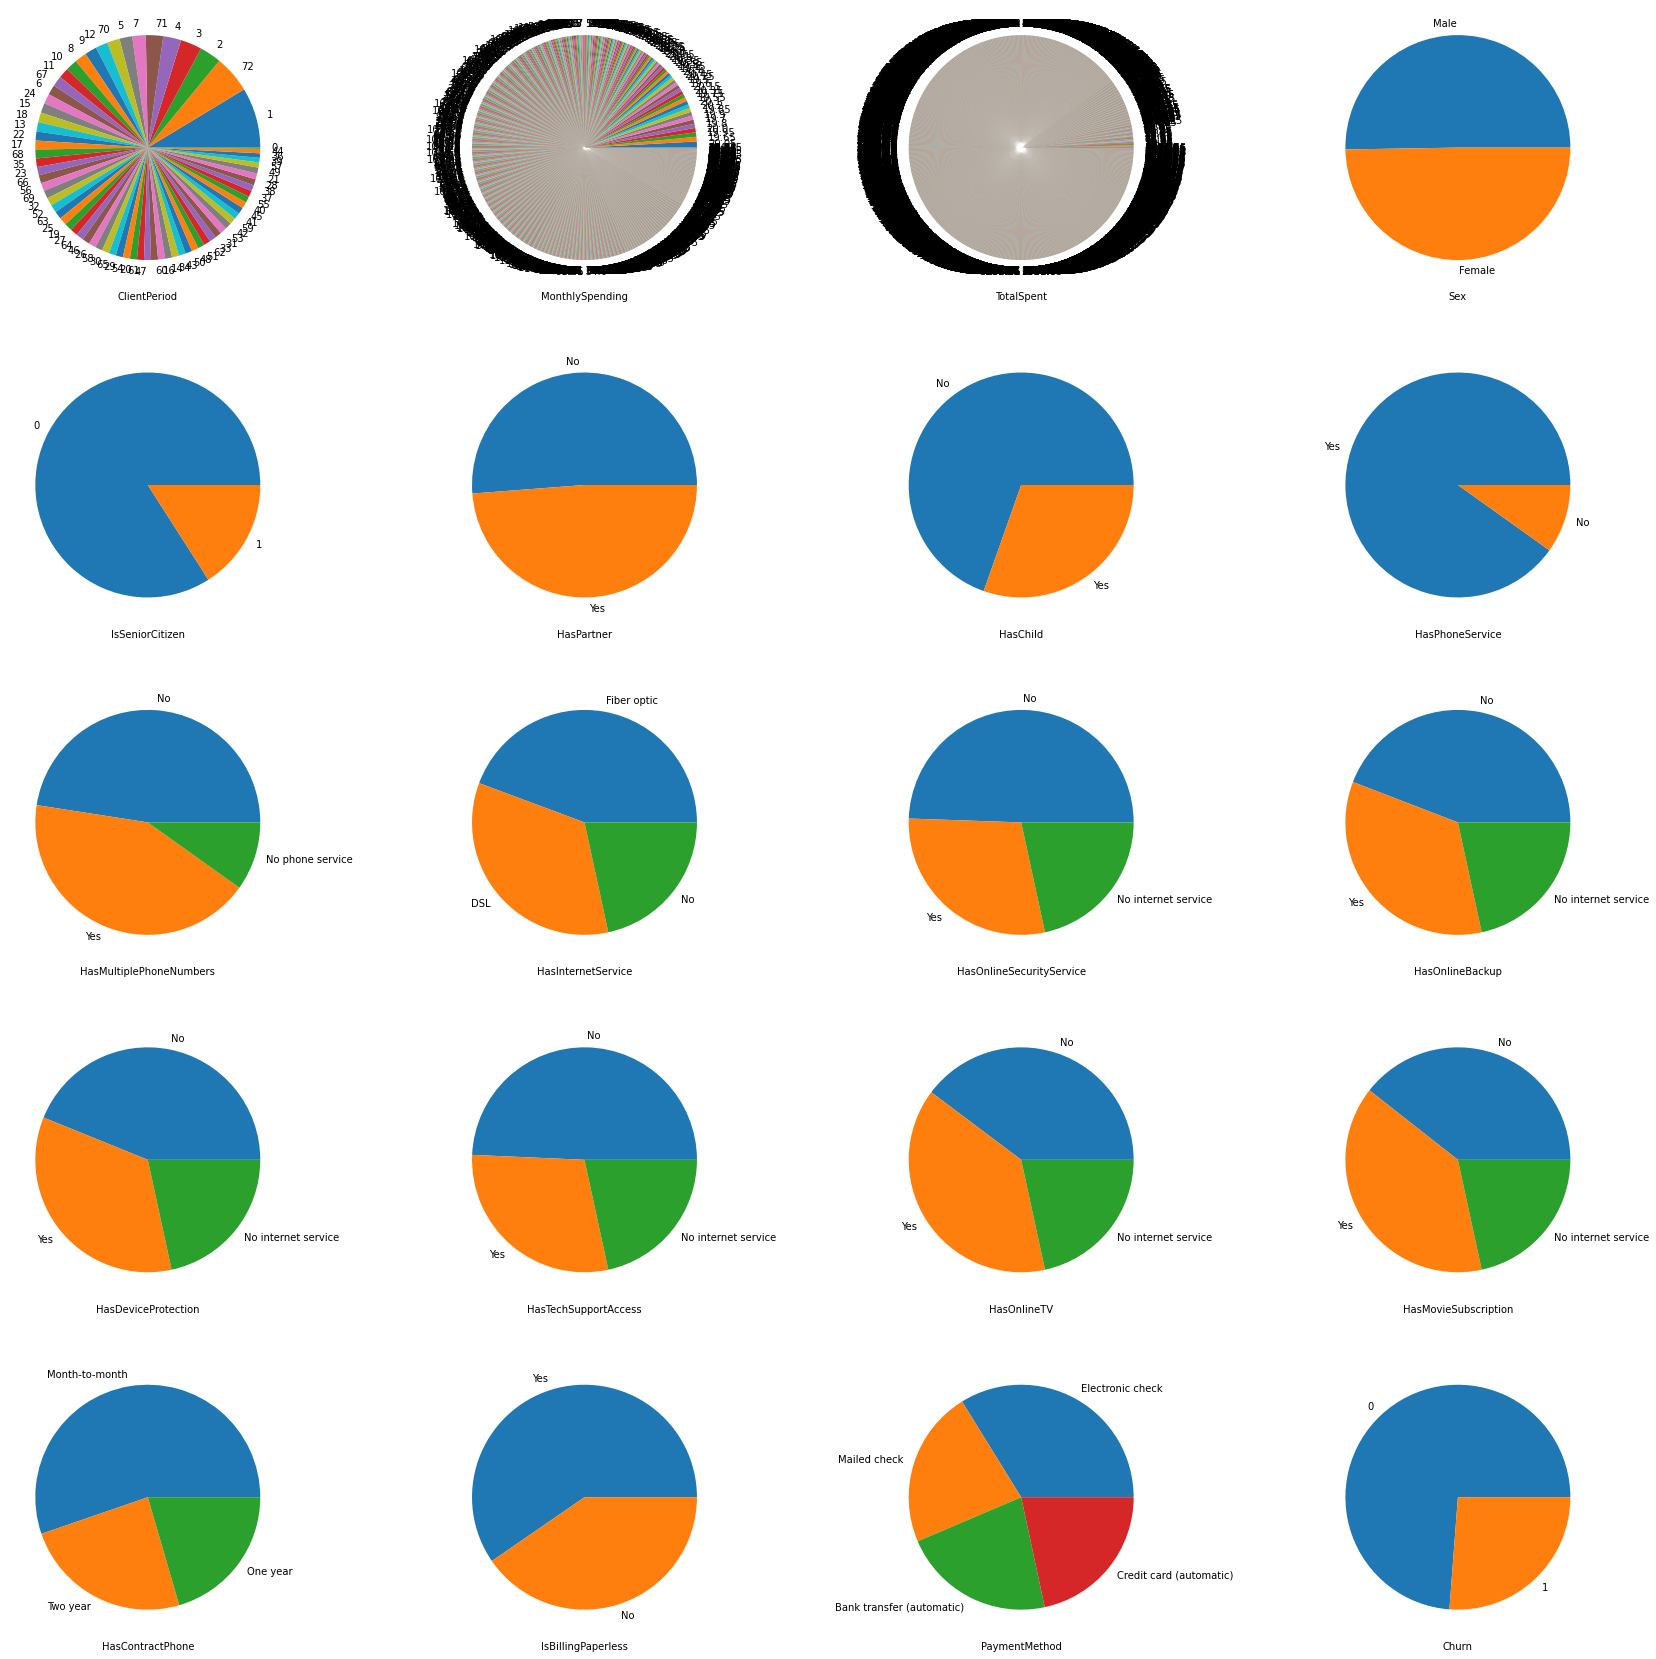

In [18]:
fig2, axes2 = plt.subplots(nrows=5, ncols=4, figsize = (30, 30))
for id, j in tqdm(enumerate(data.columns)):
    lst1 = (data[j].value_counts().index)
    lst2 = (data[j].value_counts())
    axes2[id // 4][id % 4].pie(lst2, labels = lst1)
    axes2[id // 4][id % 4].set_xlabel(j) 
plt.show()

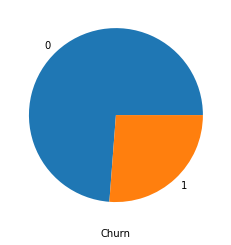

In [19]:
fig3, ax3 = plt.subplots()
ax3.pie(data[target_col].value_counts(), labels = data[target_col].value_counts().index)
ax3.set_xlabel(target_col)
plt.show()
#целевая переменная чуть-чуть не сбалансирована, классы не сбалансированны(примерное соотношение: 1/4 : 3/4)

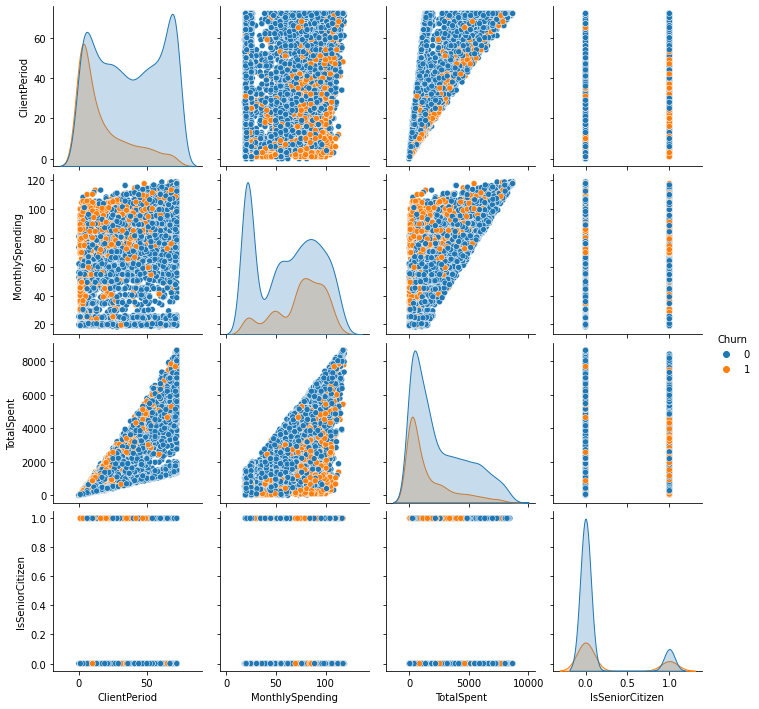

In [20]:
import seaborn as sns
sns.pairplot(data, hue = 'Churn')

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [21]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from copy import copy

In [22]:
def get_dummy_data(Data):
    categorial = pd.get_dummies(Data[cat_cols])
    numeric = Data[num_cols]
    Data = pd.concat([numeric, categorial], axis = 1)
    return Data

In [23]:
X = get_dummy_data(data)
y = copy(data['Churn'])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

In [25]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
logistic_clf = LogisticRegressionCV(n_jobs=-1, scoring='roc_auc', refit=True, max_iter=100000)

In [27]:
logistic_clf.fit(X_train_scaled, y_train.reshape(-1, 1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100000, multi_class='auto', n_jobs=-1,
                     penalty='l2', random_state=None, refit=True,
                     scoring='roc_auc', solver='lbfgs', tol=0.0001, verbose=0)

In [28]:
from sklearn.metrics import accuracy_score, f1_score
y_test_pred = logistic_clf.predict_proba(X_test_scaled)
y_train_pred = logistic_clf.predict_proba(X_train_scaled)

In [29]:
print('train score: ', roc_auc_score(y_train, y_train_pred[:, 1]))
print('test score: ', roc_auc_score(y_test, y_test_pred[:, 1]))

train score:  0.853805237339598
test score:  0.8269918083504955


In [30]:
logistic_clf.C_

array([21.5443469])

Выпишите какое лучшее качество и с какими параметрами вам удалось получить



```
Лучшее качество по мере roc-auc 0.8269918083504955

C = 21.5443469

> Indented block


```



## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
!pip install catboost

In [34]:
import catboost
cat_data = copy(data)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(cat_data.iloc[:,:-1], data[target_col],
                                                    train_size=0.8,
                                                    random_state=42)
boosting_model = catboost.CatBoostClassifier(cat_features = cat_cols) # n_estimators=200, 

In [ ]:
boosting_model.fit(X_train, y_train)

In [39]:
y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]

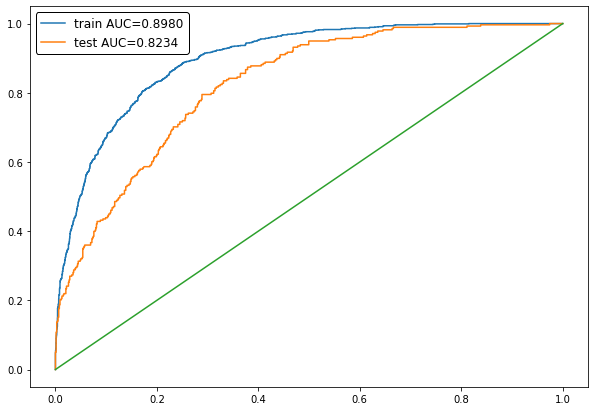

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()


In [ ]:
boosting_model1 = catboost.CatBoostClassifier(n_estimators=200, silent=True,
                                             cat_features=cat_cols,
                                             eval_metric='AUC')
boosting_model1.grid_search({'l2_leaf_reg': np.linspace(0, 1, 20)}, 
                           X_train, 
                           y_train, plot=True, refit=True)

In [42]:
y_train_predicted1 = boosting_model1.predict_proba(X_train)[:, 1]
y_test_predicted1 = boosting_model1.predict_proba(X_test)[:, 1]

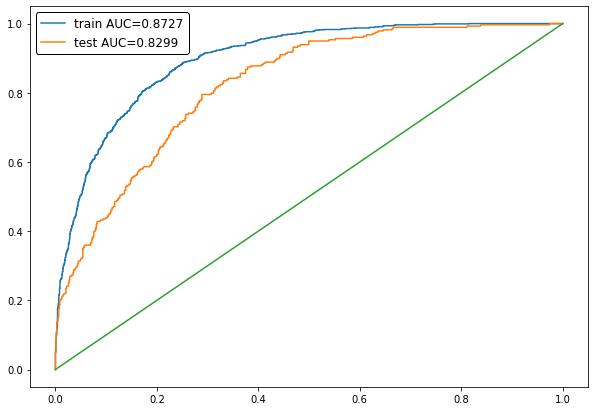

In [43]:
train_auc = roc_auc_score(y_train, y_train_predicted1)
test_auc = roc_auc_score(y_test, y_test_predicted1)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [47]:
boosting_model1.get_params()

{'cat_features': ['Sex',
  'IsSeniorCitizen',
  'HasPartner',
  'HasChild',
  'HasPhoneService',
  'HasMultiplePhoneNumbers',
  'HasInternetService',
  'HasOnlineSecurityService',
  'HasOnlineBackup',
  'HasDeviceProtection',
  'HasTechSupportAccess',
  'HasOnlineTV',
  'HasMovieSubscription',
  'HasContractPhone',
  'IsBillingPaperless',
  'PaymentMethod'],
 'eval_metric': 'AUC',
 'l2_leaf_reg': 0.47368421052631576,
 'n_estimators': 200,
 'silent': True}

In [45]:
MyModel = catboost.CatBoostClassifier(cat_features=cat_cols, silent=True, eval_metric='AUC', n_estimators=500)

In [48]:
grid = {'depth': [4, 6, 8, 10, 17],
        'l2_leaf_reg': np.linspace(0, 0.6, 10),
        'n_estimators': [25, 50, 100, 125, 150, 200, 300, 500],
        'learning_rate': np.linspace(0.01, 0.3, 10)
        }

In [ ]:
grid_search_result = MyModel.grid_search(grid, X = X_train, y = y_train, plot = True, refit = True)


bestTest = 0.8296059064
bestIteration = 47

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2247:	loss: 0.8296059	best: 0.8459642 (572)	total: 1h 19m 59s	remaining: 1h 2m 20s

bestTest = 0.8178628939
bestIteration = 9

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2248:	loss: 0.8178629	best: 0.8459642 (572)	total: 1h 20m 8s	remaining: 1h 2m 23s

bestTest = 0.8208822176
bestIteration = 6

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2249:	loss: 0.8208822	best: 0.8459642 (572)	total: 1h 20m 17s	remaining: 1h 2m 26s

bestTest = 0.8317266218
bestIteration = 286

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2250:	loss: 0.8317266	best: 0.8459642

In [ ]:
#predictions of catboost

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

In [ ]:
answer = boosting_model1.predict_proba(X_test)[:, 1]

In [ ]:
answer

array([0.04728267, 0.68931737, 0.66524796, ..., 0.8212973 , 0.57748759,
       0.01410414])

In [ ]:
submission['Churn'] = answer

In [ ]:
submission.to_csv('Output_proba.csv', index=False)

In [ ]:
boosting_model1.get_all_params()

{'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'class_names': [0, 1],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 1,
 'depth': 6,
 'eval_metric': 'AUC',
 'feature_border_type': 'GreedyLogSum',
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 200,
 'l2_leaf_reg': 0.4736842215061188,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 10,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.029999999329447743,
 'loss_function': 'Logloss',
 'max_ct

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

[link text](https:// [link text](https://))Лучшее качество: 0.8299. Параметры:'eval_metric': 'AUC',
 'l2_leaf_reg': 0.47368421052631576,
 'n_estimators': 200,
 'silent': True 

# Предсказания

In [ ]:
best_model = logistic_clf

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

In [ ]:
(X_test == ' ').sum(axis = 0)

ClientPeriod                0
MonthlySpending             0
TotalSpent                  2
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

In [ ]:
# Избавление от пропусков в столбце TotalSpent
X_test['TotalSpent'][X_test[X_test['TotalSpent'] == ' '].index] = 0
X_test['TotalSpent'] = X_test['TotalSpent'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_test = get_dummy_data(X_test)

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
y_test_answer = logistic_clf.predict_proba(X_test_scaled)[:, 1]

In [ ]:
submission['Churn'] = y_test_answer
submission.to_csv("linreg_output.csv", index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.